In [1]:
from detector_custom import Detector

In [2]:
#weight_path = '../data/caffe_layers_value.pickle'
weight_path = '/home/gmd8si/Weakly_detector/vgg16CAM.npy'

In [3]:
n_labels = 1000
detector = Detector(weight_path, n_labels)

Weights are in the order of (64, 3, 3, 3) i.e. (filters, channels, width, height)... so just remember to take transpose while using tensorflow

In [4]:
#layer = detector.pretrained_weights['conv1_1']
#feature_map =  detector.visualize_filters(layer[0])
# Then remember to plot the results

In [5]:
from imagenet_classes import class_names
import tensorflow as tf
tf.reset_default_graph
images_tf = tf.placeholder( tf.float32, [None, 224, 224, 3], name="images")
labels_tf = tf.placeholder( tf.int64, [None], name='labels')


In [6]:
c1,c2,c3,c4,conv5, conv6, gap, output, prob = detector.inference( images_tf )
classmap = detector.get_classmap( labels_tf, conv6 )

('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(3), Dimension(64)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(224), Dimension(224), Dimension(64)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(64), Dimension(64)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(224), Dimension(224), Dimension(64)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(64), Dimension(128)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(112), Dimension(112), Dimension(128)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(128), Dimension(128)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(112), Dimension(112), Dimension(128)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(128), Dimension(256)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(56), Dim

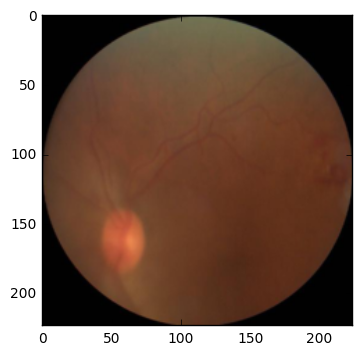

In [1]:
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize

%matplotlib inline

img1 = imread('a.JPG', mode='RGB')
img1 = imresize(img1, (224, 224))
plt.imshow (img1)
#plt.imshow( img1, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
#prob = sess.run(vgg.probs, feed_dict={vgg.imgs: [img1]})[0]
#preds = (np.argsort(prob)[::-1])[0:5]
#for p in preds:
#    print class_names[p], prob[p]

In [12]:
#im_content = tf.read_file('laska.png')
#image = tf.image.decode_jpeg(im_content, channels=3)
#image = tf.cast(image, tf.float32)
#train_image_batch = tf.train.batch(
#    [image], batch_size=1)
import numpy as np
img = np.expand_dims(img1, axis = 0)
#img = tf.cast(img, tf.float32) / 255.
#print (img.shape)
init_op = tf.initialize_all_variables()

label_predictions:
jellyfish
radio telescope, radio reflector


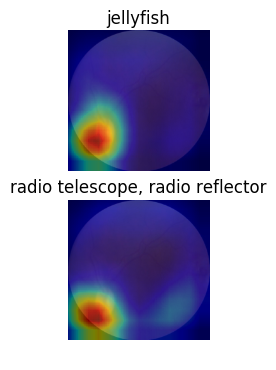

In [13]:
#f, axx = plt.subplots(2, sharey=True)

with tf.Session() as sess:
    sess.run(init_op)
    conv6_val, output_val= sess.run([conv6, output], feed_dict={ images_tf: img})
    
    label_predictions = output_val.argmax(axis=1)
    #print label_predictions
    #print 'lab_preds', label_predictions.shape
    
    preds = (output_val.argsort(axis=1)[:,-3:])[0:5]
    label1 = preds[:,-1] 
    label2 = preds[:,-2]
    #print 'ch_shape', ch
    #print 'preds_shape', preds.shape
    preds_s = np.squeeze(preds, axis=(0,))
    
    print ('label_predictions:')
    print class_names[preds_s[-1]]
    print class_names[preds_s[-2]]
    #print class_names[preds_s[-3]]
    
    classmap_val1 = sess.run(classmap, feed_dict={ labels_tf: label1, conv6: conv6_val})
    classmap_val2 = sess.run(classmap, feed_dict={ labels_tf: label2, conv6: conv6_val})
    
    #classmap_vis = map(lambda x: ((x-x.min())/(x.max()-x.min())), classmap_vals)

    cc1 = np.squeeze(classmap_val1, axis=(0,))
    cc2 = np.squeeze(classmap_val2, axis=(0,))
    #print (cc.shape)
    #for vis, ori in zip(classmap_vis, current_images):
    #print l_name
    plt.subplot(2,1,1)
    plt.imshow(img1)
    plt.imshow( cc1, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
    plt.title(class_names[preds_s[-1]])
    plt.axis('off')
    
    plt.subplot(2,1,2)
    plt.imshow(img1)
    plt.imshow( cc2, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
    plt.title(class_names[preds_s[-2]])
    plt.axis('off')

In [47]:
#squeezed_out = np.squeeze(output_val, axis=(0,))
#print (squeezed_out.argsort())
preds = (output_val.argsort(axis=1)[:,-3:])[0:5]
preds = np.squeeze(preds, axis=(0,))
print preds
#print ((output_val.argsort()[:,:-1])[:,:-1])
#print (np.argsort(output_val, axis=1)[::-1])
#print (output_val.argsort()[-3:])[::-1]

[246 284 180]


In [ ]:
    #classmap_answer = sess.run(classmap,feed_dict={labels_tf: current_labels,conv6: conv6_val})

    #classmap_vis = map(lambda x: ((x-x.min())/(x.max()-x.min())), classmap_vals)

    #for vis, ori,ori_path, l_name in zip(classmap_vis, current_images, current_image_paths, current_label_names):
    #    print l_name
    #    plt.imshow( ori )
    #    plt.imshow( vis, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
    #    plt.show()

In [9]:
with tf.Session() as sess:
    sess.run(init_op)
    #conv6_val, prob = sess.run([conv6, prob],feed_dict={images_tf: img })
    prob = sess.run(prob,feed_dict={images_tf: img })   # This returned value is always a numpy

In [11]:
print prob.shape
preds = (prob.argmax(axis = 1))[0:5]
#preds = (np.argsort(prob)[:,:,-1])[0:5]
print preds
#for p in preds:
print class_names[preds]

(1, 1000)
[404]
airliner


/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [25]:
#print output_val
preds = tf.nn.softmax(output_val)
#preds = (np.argsort(prob))[0:5]
print prob

NameError: name 'output_val' is not defined

In [5]:
# This is for visualizing weight file
import numpy as np
keys = sorted(detector.pretrained_weights.keys())
for i, k in enumerate(keys):
    print i, k  #, detector.pretrained_weights[k]
#So the weights are alright and are referenced with the layer name IDs


0 conv1_1
1 conv1_2
2 conv2_1
3 conv2_2
4 conv3_1
5 conv3_2
6 conv3_3
7 conv4_1
8 conv4_2
9 conv4_3
10 conv5_1
11 conv5_2
12 conv5_3
13 drop6
14 drop7
15 fc6
16 fc7
17 fc8
18 pool1
19 pool2
20 pool3
21 pool4
22 pool5
23 prob
24 relu1_1
25 relu1_2
26 relu2_1
27 relu2_2
28 relu3_1
29 relu3_2
30 relu3_3
31 relu4_1
32 relu4_2
33 relu4_3
34 relu5_1
35 relu5_2
36 relu5_3
37 relu6
38 relu7
